In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time

In [15]:
def buble_sort(x):
    """
    Args:
        x (list of floats or ints): the list of the numbers to be sorted
        
    Returns:
        list : the sorted list
    """
    
    res = list(x)
    #print(res)
    
    n = len(res)
    #print(n)
    
    iteration = 1
    while res[0] > res[1]:
        #print(F"iteration = {iteration}")        
        iteration = iteration + 1
        i = 0
        while i < n-1:
            if res[i] > res[i+1]:
                tmp = res[i+1]
                res[i+1] = res[i]
                res[i] = tmp        
                #print(res) 
            i = i + 1
    
    return res

In [16]:
def min(x):
    
    n = len(x)
    xmin = x[0]
    min_indx = 0
    
    for i in range(n):
        if x[i] < xmin:
            xmin = x[i]
            min_indx = i
    return xmin, min_indx
        

def bruteforce_sort(X):
    """
    Args:
        x (list of floats or ints): the list of the numbers to be sorted
        
    Returns:
        list : the sorted list
    """
    
    x = list(X)
    res = []
    
    while len(x)>0:
        xmin, minindx = min(x)
        x.pop(minindx)
        res.append(xmin)    
        
    return res

In [17]:
def merge_sort(x):
    """
    This function sorts the elements of a list using mergesort algorithm
    Args:
        x (list): The list of numbers
    Returns:
        sorted_x (list): The sorted elements using merge sort algorithm
    """
    x = np.array(x)
    sorted_x = np.sort(x, kind='mergesort')
    return list(sorted_x)

In [7]:
# Testing merge sort algorithm
a = np.random.randint(0, 1000, 10)
print(a)

[510 328 809 380 411 761 921 980 942 603]


In [8]:
print(merge_sort(a))

[328, 380, 411, 510, 603, 761, 809, 921, 942, 980]


### Testing the timing of the sorting algorithms

In [25]:
num_elements = np.arange(1000,2e4,1000)
timing = []
for i, num_element in enumerate(num_elements):
    print(num_element)
    tmp = []
    a = np.random.randint(0, 1e6, int(num_element))
    # setup the timer from the moment where it 
    t1 = time.time()
    buble_sort(a)
    tmp.append(time.time()-t1)
    t1 = time.time()
    bruteforce_sort(a)
    tmp.append(time.time()-t1)
    t1 = time.time()
    merge_sort(a)
    tmp.append(time.time()-t1)
    timing.append(tmp)
timing = np.array(timing)
print(timing.shape)

1000.0
2000.0
3000.0
4000.0
5000.0
6000.0
7000.0
8000.0
9000.0
10000.0
11000.0
12000.0
13000.0
14000.0
15000.0
16000.0
17000.0
18000.0
19000.0
(19, 3)


<IPython.core.display.Javascript object>


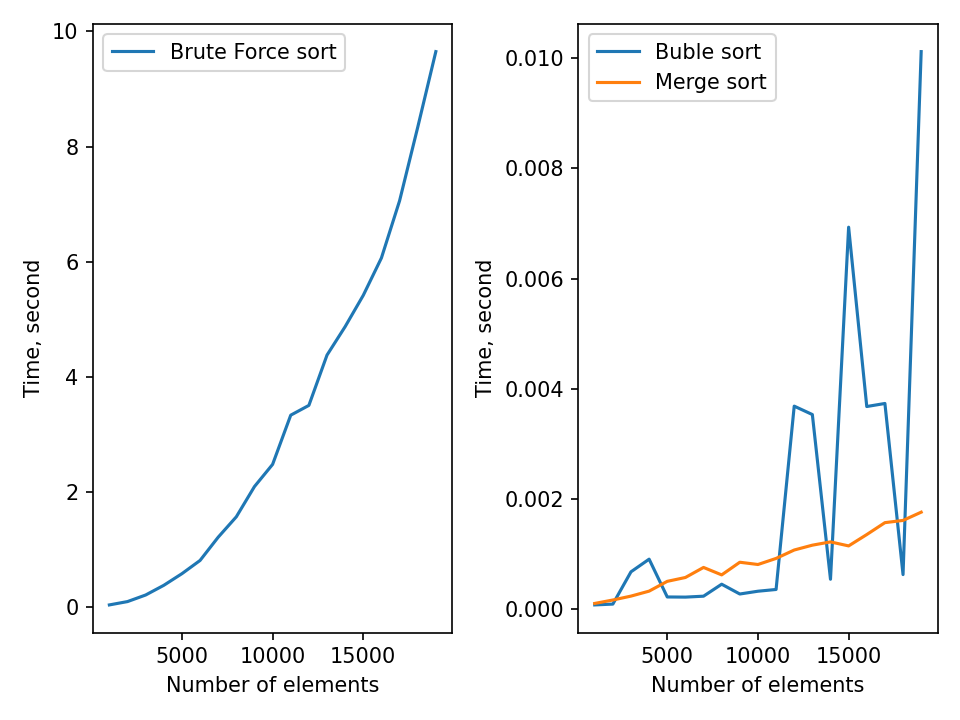

In [34]:
%matplotlib notebook
plt.subplot(1,2,1)
plt.plot(num_elements, timing[:,1], label='Brute Force sort')
plt.ylabel('Time, second')
plt.xlabel('Number of elements')
plt.legend()
plt.subplot(1,2,2)
plt.plot(num_elements, timing[:,0], label='Buble sort')
plt.plot(num_elements, timing[:,2], label='Merge sort')
plt.ylabel('Time, second')
plt.xlabel('Number of elements')
plt.legend()
plt.tight_layout()

We see $O(N^2)$ scaling for Brute Force and Bubble sorting methods and for the Merge Sort algorithm we see an almost $O(NlogN)$ scaling behavior. However, Brute Force method seems to have a longer calculation time compared to Bubble sorting method. The reason is that in the Brute Force method, we find the minimum, using `min` function, in another `for` loop which doesn't break and checks up to final elements.